<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/master/math_and_stats/which_power_r_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load pwr package to easily calculate the statistical power
if(!require(pwr)){install.packages('pwr')}
library(pwr)

[1] "simulated power =  0.49976"

[1] "calculated power =  0.500464574885318"

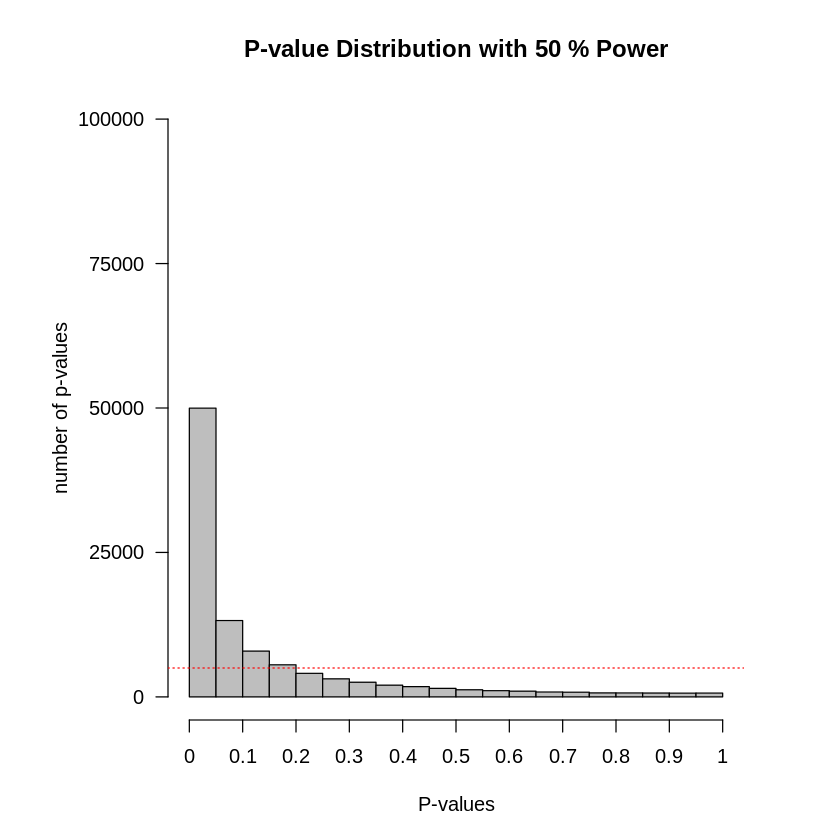

In [14]:

#Disable scientific notation (1.05e10)
options(scipen=999)
#Set number of simulations
nSims <- 100000 #number of simulated experiments

M<-106 #Mean IQ score in the sample (will be compared with 100 in a one-sample t-test)
n<-26 #set sample size
SD<-15 #SD of the simulated data
#With a mean difference of 6, and SD of 15, and a sample size of 26, the test has 50% power)
  
p <-numeric(nSims) #set up empty variable to store all simulated p-values
bars<-20
#Run simulation
for(i in 1:nSims){ #for each simulated experiment
  x<-rnorm(n = n, mean = M, sd = SD) #Simulate data with specified mean, standard deviation, and sample size
  z<-t.test(x, mu=100) #perform the t-test against mu (set to value you want to test against)
  p[i]<-z$p.value #get the p-value and store it
}

#Check power by summing significant p-values and dividing by number of simulations
paste('simulated power = ', (sum(p < 0.05)/nSims)) #power
#Calculate power formally by power analysis
power<-pwr.t.test(d=(M-100)/SD, n=n,sig.level=0.05,type="one.sample",alternative="two.sided")$power #determines M when power > 0. When power = 0, will set  M = 100.
paste('calculated power = ', power) #power

#Plot figure
#png(file="P-valueDist.png",width=4000,height=3000, , units = "px", res = 500)
op <- par(mar = c(5,7,4,4)) #change white-space around graph
hist(p, breaks=bars, xlab="P-values", ylab="number of p-values\n", axes=FALSE,
     main=paste("P-value Distribution with",round(power*100, digits=1),"% Power"),
     col="grey", xlim=c(0,1),  ylim=c(0, nSims))
axis(side=1, at=seq(0,1, 0.1), labels=seq(0,1,0.1))
axis(side=2, at=seq(0,nSims, nSims/4), labels=seq(0,nSims, nSims/4), las=2)
abline(h=nSims/bars, col = "red", lty=3)
#dev.off()

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/